<a href="https://colab.research.google.com/github/hiddenntreasure/Self-Driving-object/blob/master/driving_data_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install scipy==1.1.0

ERROR! Session/line number was not unique in database. History logging moved to new session 63
     |████████████████████████████████| 31.2MB 140kB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
import scipy.misc
import random
import numpy as np

In [0]:
x = scipy.misc.imread('/content/drive/My Drive/Colab Notebooks/CS 11 : Self Driving Car/driving_dataset/0.jpg')[-150:]
print(x.shape)
x= (scipy.misc.imresize(x,[66,200]))
print(x.shape)
x=x/255.0
print(x.shape)

(150, 455, 3)
(66, 200, 3)
(66, 200, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


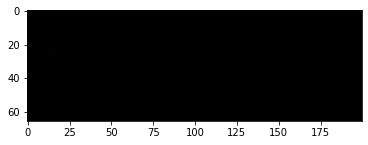

In [0]:
import matplotlib.pyplot as plt
plt.imshow(np.uint8(x))
plt.show()

In [0]:
x.shape

(66, 200, 3)

In [0]:
x.shape

(256, 455, 3)

In [0]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [0]:
a = x[:int(15*0.8)]
b= x[-int(15*0.2):]
print(a)
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[13, 14, 15]


#Driving_data

In [0]:
import scipy.misc
import random

In [0]:
xs = []
ys = []

# points to the end of the last batch
train_batch_pointer = 0
test_batch_pointer = 0

# Read data.txt
with open('/content/drive/My Drive/Colab Notebooks/CS 11 : Self Driving Car/data.txt') as f:
  for line in f:
    xs.append("/content/drive/My Drive/Colab Notebooks/CS 11 : Self Driving Car/" +line.split()[0])
    ys.append(float(line.split()[1])*scipy.pi/180)

# Number of images in the dataset
num_images = len(xs)

train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = xs[-int(len(xs) * 0.2):]

def LoadTrainBatch(batch_size):
  global train_batch_pointer
  x_out = []
  y_out = []

  for i in range(0,batch_size):
    x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i)% num_train_pointer])[-150:]\
                                     ,[66,200])/255.0)
    y_out.append([train_ys[(train_batch_pointer + i)% num_train_images]])
  train_batch_pointer += batch_size
  return x_out,y_out

def LoadTestBatch(batch_size):
  global val_batch_pointer
  x_out = []
  y_out = []
  for i in range(0, batch_size):
    x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], [66, 200]) / 255.0)
    y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
  val_batch_pointer += batch_size
  return x_out, y_out
